In [35]:
from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline

In [36]:
# 读取数据
# 元数据没有列名，这里制定为了后续方便
columns = ['index','sentence1','sentence2','similarity']
data = pd.read_csv(
    os.path.join('Match/atecnlpsim/input_data/atec_nlp_sim_train.csv'),
    sep='\t',
    header=None,
    names=columns,
    index_col=0,
    encoding='utf-8',
)
data.describe()

,similarity
count,39346.000000
mean,0.217277
std,0.412398
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39346 entries, 1 to 39346
Data columns (total 3 columns):
sentence1     39346 non-null object
sentence2     39346 non-null object
similarity    39346 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [38]:
data.head()

,sentence1,sentence2,similarity
index,,,
1,﻿怎么更改花呗手机号码,我的花呗是以前的手机号码，怎么更改成现在的支付宝的号码手机号,1
2,也开不了花呗，就这样了？完事了,真的嘛？就是花呗付款,0
3,花呗冻结以后还能开通吗,我的条件可以开通花呗借款吗,0
4,如何得知关闭借呗,想永久关闭借呗,0
5,花呗扫码付钱,二维码扫描可以用花呗吗,0


In [39]:
data_old = data
data['sentence1_len'] = data['sentence1'].apply(lambda x:len(str(x)))
data['sentence2_len'] = data['sentence2'].apply(lambda x:len(str(x)))
# 调整列的顺序
data = data[['sentence1','sentence1_len','sentence2','sentence2_len','similarity']]
data.head()

,sentence1,sentence1_len,sentence2,sentence2_len,similarity
index,,,,,
1,﻿怎么更改花呗手机号码,11,我的花呗是以前的手机号码，怎么更改成现在的支付宝的号码手机号,30,1
2,也开不了花呗，就这样了？完事了,15,真的嘛？就是花呗付款,10,0
3,花呗冻结以后还能开通吗,11,我的条件可以开通花呗借款吗,13,0
4,如何得知关闭借呗,8,想永久关闭借呗,7,0
5,花呗扫码付钱,6,二维码扫描可以用花呗吗,11,0


In [40]:
data.describe()
# 如下可知句子最长97，最小5，75%的长度都在15以下

,sentence1_len,sentence2_len,similarity
count,39346.000000,39346.000000,39346.000000
mean,13.335053,13.356250,0.217277
std,6.066028,6.021572,0.412398
min,5.000000,5.000000,0.000000
25%,10.000000,10.000000,0.000000
50%,12.000000,12.000000,0.000000
75%,15.000000,15.000000,0.000000
max,97.000000,88.000000,1.000000


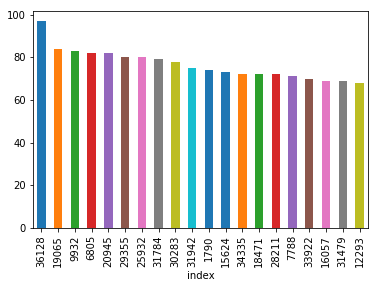

In [41]:
# 最长的句子长度
s1_mx = data['sentence1_len'].sort_values(ascending=False)
s1_mx.head(20).plot(kind='bar')


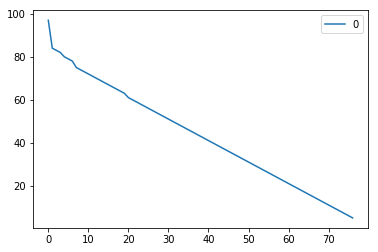

In [42]:
s1_mx = pd.DataFrame(data['sentence1_len'].sort_values(ascending=False).unique())
s1_mx.plot()

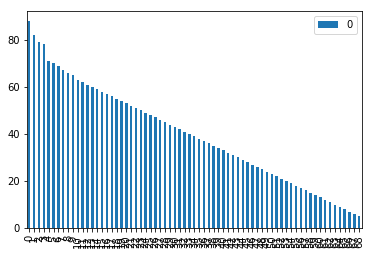

In [43]:
# 查看了非重复值
s2_mx =  pd.DataFrame(data['sentence2_len'].sort_values(ascending=False).unique())
s2_mx.plot(kind='bar')

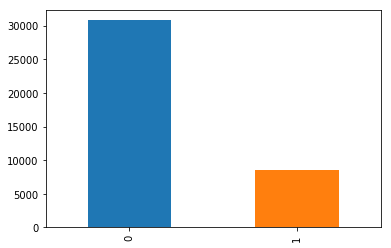

In [44]:
# 查看正负类比例
data.similarity.value_counts().plot(kind='bar')

In [45]:
# 接下来就是分词
# 查看高频词
# 处理同义词
# 建立辞典
import jieba
jieba.load_userdict(os.path.join('Match/atecnlpsim/input_data/atec_dict.dict')) 
# data_all = pd.concat([data['sentence1'],data['sentence2']],axis=0).to_dataframe()
data_all = data['sentence1'].append(data['sentence2'],ignore_index=True) # ignore_index=True指的是重新排列索引
data_all.to_frame(name='sentence')
data_all.count()
# 见了鬼了，自定义辞典不起做用
# ['花呗','借呗','借呗','蚂蚁借呗','支付宝']
jieba.add_word('花呗')
jieba.add_word('借呗')
jieba.add_word('蚂蚁借呗')
jieba.add_word('蚂蚁花呗')
jieba.add_word('支付宝')
jieba.add_word('余额宝')
jieba.add_word('是不是')
jieba.add_word('不是')
jieba.add_word('怎么还款')
jieba.add_word('怎么开通')
jieba.add_word('还能')
jieba.add_word('开不了')
jieba.add_word('开通不了')
jieba.add_word('要还')

In [46]:
# 构建一个词袋
words_list=[]

stop_words_path = os.path.join('Match/atecnlpsim/input_data/stop_words.dict')
stop_words = [line.strip() for line in open(stop_words_path,'r',encoding='utf-8').readlines()]
# 同义词
similar_words_path = os.path.join('Match/atecnlpsim/input_data/atec_similarity.dict')
similar_words = [line.strip() for line in open(similar_words_path,'r',encoding='utf-8').readlines()]

# 去除停用词，同时替换同义词
def remove_stop_words(x):
    word_split=''
    sentence_list = jieba.cut(x,cut_all=False,HMM=True)
    for word in sentence_list:
        for similar_word in similar_words:
            if word in similar_word.split(' '):
                word = similar_word.split(' ')[0].strip()
        if word not in stop_words:
            if word != '\t':
                word_split += word.strip()+' '
                words_list.append(word.strip())
    return word_split.strip()

In [18]:
data_all = data_all.apply(lambda x:remove_stop_words(x))
df_words = pd.DataFrame(words_list,columns=['word'])
df_words.count()

word    2996770
dtype: int64

In [19]:
df_words['word'].value_counts()

       1385682
花呗      242859
我        69888
吗        48396
怎么       37143
还        36770
还款       36090
可以       32664
用        30476
为什么      28836
额度       25230
分期       19980
是        19767
开通       17022
不能       14778
钱        14625
没有       13389
不        13386
有        12909
什么       12660
使用       12408
能        11582
在        11500
支付宝       9825
到         9560
支付        8721
付款        8712
月         8512
多少        8115
逾期        7920
        ...   
扣到           1
比人           1
没给           1
能取           1
没交           1
没动           1
打好           1
请用           1
领去           1
改小           1
一前           1
没份           1
前个           1
太长           1
地钱           1
中用           1
往里           1
如家           1
算出           1
领用           1
会弹           1
天降           1
正忙           1
不往           1
用用           1
开小           1
无语           1
借人           1
充到           1
上过           1
Name: word, Length: 8212, dtype: int64

In [20]:
data_all.head(10)

0                 ﻿   怎么   更改   花呗   手机号码
1              也   开不了   花呗   就   这样   完事
2              花呗   冻结   以后   还能   开通   吗
3                       如何   得知   关闭   花呗
4                            花呗   扫码   付钱
5               花呗   逾期   后   不能   分期   吗
6                            花呗   分期   清空
7                       花呗   逾期   短信   通知
8    花呗   即将   到期   要还   账单   还能   分期   吗
9            花呗   为什么   不能   支付   手机   交易
dtype: object

In [21]:
# 训练词向量
def word_vector(data_all):
    from gensim.models import Word2Vec
    data_all = list(np.array(data_all.apply(lambda x:str(x).split(' '))))
    for i in [1, 2, 3, 4,5,6]:
        model = Word2Vec(data_all, window=i, sg=0, size=100, min_count=1, negative=3, sample=0.001, hs=1, workers=4,cbow_mean=1)
        model.save(os.path.join('Match/atecnlpsim/input_data/model.model'))
        model.wv.save_word2vec_format(os.path.join("Match/atecnlpsim/input_data/model.ve"+str(i)), binary=False)


In [31]:
data_old['sentence1'] = data_old['sentence1'].apply(lambda x:remove_stop_words(x))
data_old['sentence2'] = data_old['sentence2'].apply(lambda x:remove_stop_words(x))
data_old.head()

AttributeError: 'numpy.ndarray' object has no attribute 'decode'

In [32]:
embeddings_index = {} # {'你好'：[0.13,0.1212.....]}
with open(os.path.join('Match/atecnlpsim/input_data', 'model.ve1'),encoding='utf-8') as f:
    for line in f:
        values = line.split(' ')
        word = values[0]
        coefs = np.asarray(values[1:],dtype='float64')
        embeddings_index[word] = coefs

In [26]:
def to_vector(x):
    vt = np.zeros(100)
    for word in x.split(' '):  # ==x.split(' ')
        word_v = embeddings_index.get(word)
        if word_v is not None:
            vt += word_v
    return vt




In [33]:

data_old['sentence1'] = data_old['sentence1'].apply(lambda x:to_vector(x))
data_old['sentence2'] = data_old['sentence2'].apply(lambda x:to_vector(x))
data_old.head()



AttributeError: 'numpy.ndarray' object has no attribute 'split'

In [34]:
# data_old['sentence1_len'] - data_old['sentence2_len']
